In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
%matplotlib inline

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wjddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
DATA_IN_PATH = './data_in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
sample_submission.csv         0.02MB
test.csv                      0.42MB
test_clean.csv                0.26MB
train.csv                     0.99MB
train_clean.csv               0.57MB


In [8]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))
train_length = train_data['text'].apply(len)



전체 학습데이터의 개수: 7613


In [10]:
print(train_data['text'][0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


Text(0, 0.5, 'Number of review')

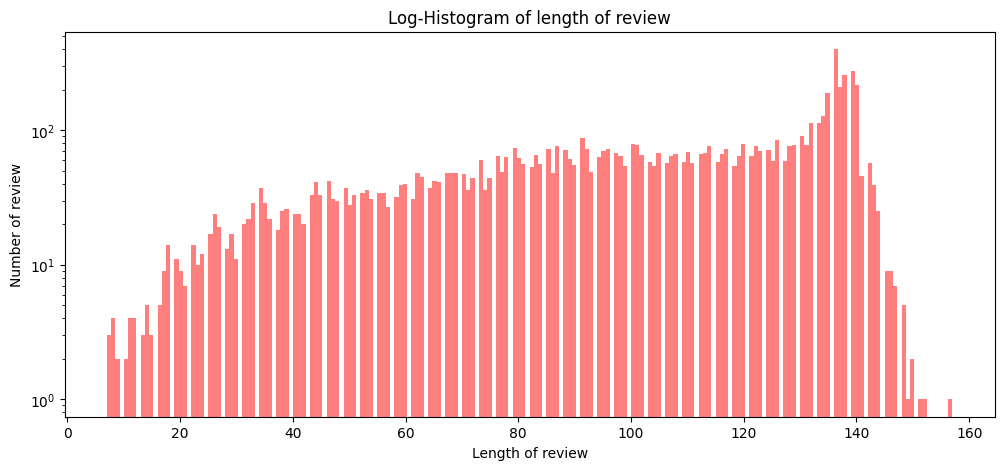

In [12]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [13]:
additional_stopwords = {'https', 'http'}
stops = set(stopwords.words("english"))
stops.update(additional_stopwords)

In [26]:
!pip install lxml

In [29]:
def preprocessing(review, remove_stopwords = False ): 

    review_text = BeautifulSoup(review, "lxml").get_text()
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    words = review_text.lower().split()

    if remove_stopwords: 
        words = [w for w in words if not w in stops]
        clean_review = ' '.join(words)

    else:
        clean_review = ' '.join(words)

    return clean_review

In [30]:
import html5lib
clean_train_reviews = []
for text in train_data['text']:
    clean_train_reviews.append(preprocessing(text, remove_stopwords = True))

# 전처리한 데이터 출력
print(train_data['text'][0])
print(clean_train_reviews[0])


C:\Users\wjddu\Anaconda3\envs\jybgpu\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
deeds reason earthquake may allah forgive us


In [31]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'target': train_data['target']})

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [33]:
print(text_sequences[0])

[4598, 725, 167, 71, 1463, 4599, 21]


In [34]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
print("전체 단어 개수: ", len(word_vocab))
word_vocab

전체 단어 개수:  21979


{'co': 1,
 'like': 2,
 'fire': 3,
 'get': 4,
 'new': 5,
 'via': 6,
 'u': 7,
 'news': 8,
 'people': 9,
 'one': 10,
 'w': 11,
 'video': 12,
 'disaster': 13,
 'emergency': 14,
 'p': 15,
 'x': 16,
 'police': 17,
 'c': 18,
 'r': 19,
 'would': 20,
 'us': 21,
 'time': 22,
 'body': 23,
 'b': 24,
 'still': 25,
 'e': 26,
 'california': 27,
 'n': 28,
 'storm': 29,
 'burning': 30,
 'crash': 31,
 'day': 32,
 'back': 33,
 'suicide': 34,
 'man': 35,
 'got': 36,
 'rt': 37,
 'know': 38,
 'buildings': 39,
 'l': 40,
 'pm': 41,
 'first': 42,
 'world': 43,
 'see': 44,
 'go': 45,
 'v': 46,
 'bomb': 47,
 'going': 48,
 'nuclear': 49,
 'two': 50,
 'h': 51,
 'love': 52,
 'fires': 53,
 'g': 54,
 'attack': 55,
 'today': 56,
 'dead': 57,
 'killed': 58,
 'year': 59,
 'k': 60,
 'youtube': 61,
 'car': 62,
 'q': 63,
 'hiroshima': 64,
 'full': 65,
 'life': 66,
 'train': 67,
 'old': 68,
 'war': 69,
 'let': 70,
 'may': 71,
 'accident': 72,
 'good': 73,
 'j': 74,
 'families': 75,
 'say': 76,
 'think': 77,
 'watch': 78,
 '

In [35]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)
MAX_SEQUENCE_LENGTH = 150
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (7613, 150)


In [36]:
train_labels = np.array(train_data['target'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (7613,)


In [37]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    # 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)


# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [38]:
test_data = pd.read_csv(DATA_IN_PATH + "test.csv", encoding='utf-8')

clean_test_reviews = []
for text in test_data['text']:
    clean_test_reviews.append(preprocessing(text, remove_stopwords = True))
    
clean_test_df = pd.DataFrame({'text': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

C:\Users\wjddu\Anaconda3\envs\jybgpu\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [39]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from tqdm import tqdm

In [52]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [53]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'
tf.random.set_seed(1234)


In [54]:
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [44]:
prepro_configs['vocab_size']

21979

In [59]:
model = Sequential([
    layers.Embedding(input_dim=21979, output_dim=100),
    layers.LSTM(150, return_sequences=True),
    layers.LSTM(150),
    layers.Dropout(0.2),
    layers.Dense(150, activation='tanh'),
    layers.Dense(1, activation='sigmoid'),
])

In [61]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

history = model.fit(train_input, train_label, batch_size=50, epochs=15,
                    validation_split=0.1, callbacks=earlystop_callback)

Epoch 1/15
138/138 [==============================] - 36s 216ms/step - loss: 0.6837 - accuracy: 0.5732 - val_loss: 0.6937 - val_accuracy: 0.5341
Epoch 2/15
138/138 [==============================] - 46s 333ms/step - loss: 0.6825 - accuracy: 0.5744 - val_loss: 0.6946 - val_accuracy: 0.5341
Epoch 3/15
138/138 [==============================] - 46s 334ms/step - loss: 0.6822 - accuracy: 0.5744 - val_loss: 0.6916 - val_accuracy: 0.5341
Epoch 4/15
138/138 [==============================] - 48s 345ms/step - loss: 0.6823 - accuracy: 0.5744 - val_loss: 0.6958 - val_accuracy: 0.5341
